# Lab | Final regression model in "Health Care for All" Case

### Instructions

At this point, we have created a model to predict who will make a donation and who won't. But, what about the amount of money that each person will give?
In this lab, subset those that made a donation and use that subset to create a model to predict how much money will they give.

Evaluate the result of your model and estimate how much better the result are for the bussiness in comparison with the naive scenario we discuss on Monday.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load data from csv files

numeric_data = pd.read_csv('./files_for_lab/numerical.csv')
categorical_data = pd.read_csv('./files_for_lab/categorical.csv')
target_data = pd.read_csv('./files_for_lab/target.csv')

In [3]:
# assemble data as a single dataframe
HC4A_data = pd.concat([numeric_data, categorical_data, target_data], axis =1)
HC4A_data.shape

(95412, 339)

In [4]:
# check the balance of data based on the label TARGET_B
HC4A_data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [5]:
donor_data = HC4A_data[HC4A_data['TARGET_D'] > 0.0]
donor_data.shape
donor_data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,87,1,36,1,88,1,94,4,96,3,87,1,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,90,1,0,2,90,4,93,1,95,12,90,4,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,9

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

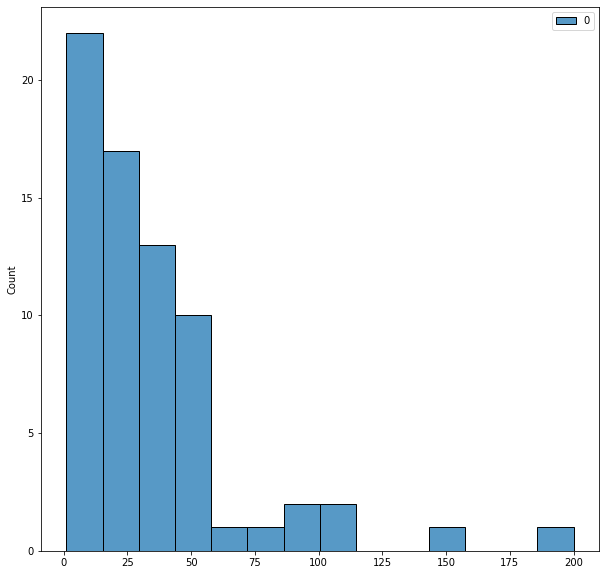

In [6]:
import seaborn as sns
display(donor_data['TARGET_D'].describe())

fig = plt.figure(figsize = (10,10))
sns.histplot(donor_data.groupby('TARGET_D')['TARGET_D'])
plt.show()


In [7]:
# split data into features and targets
X_don = donor_data.drop(['TARGET_D'], axis = 1).reset_index()
y_don = donor_data['TARGET_D'].reset_index()
y_don.head()
X_don.shape

(4843, 339)

In [8]:
# split data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X_don, y_don, test_size = 0.3, random_state =23)
X_train.shape

(3390, 339)

In [9]:
# split training and testing data for one hot encoding and scaling.
Xtrain_categorical = X_train.select_dtypes('object')
Xtrain_numerical = X_train.select_dtypes(['int64','float64'])
Xtest_categorical = X_test.select_dtypes('object')
Xtest_numerical = X_test.select_dtypes(['int64','float64'])
Xtrain_categorical.shape


(3390, 7)

In [10]:
# One Hot Encode categorical data
OH_encoder = OneHotEncoder(drop = 'first').fit(Xtrain_categorical)
Xtrain_categorical_enc = pd.DataFrame(OH_encoder.transform(Xtrain_categorical).toarray())
Xtest_categorical_enc = pd.DataFrame(OH_encoder.transform(Xtest_categorical).toarray())
print(Xtrain_categorical_enc.shape)
print(Xtrain_numerical.shape)
Xtrain_categorical_enc.head()

(3390, 24)
(3390, 332)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#Scale numerical data
from sklearn.preprocessing import StandardScaler
st_transformer = StandardScaler().fit(Xtrain_numerical)
Xtrain_numerical_st = pd.DataFrame(st_transformer.transform(Xtrain_numerical))
Xtest_numerical_st = pd.DataFrame(st_transformer.transform(Xtest_numerical))
Xtrain_numerical_st.shape

(3390, 332)

In [12]:
# reassemble training and testing data
X_train_st = pd.concat([Xtrain_numerical_st, Xtrain_categorical_enc], axis = 1)
X_test_st = pd.concat([Xtest_numerical_st, Xtest_categorical_enc], axis = 1)
print(X_train_st.shape)
print(X_test_st.shape)


(3390, 356)
(1453, 356)


In [13]:
# create and train a regression model to estimate the average donation from donors based on other features.
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor().fit(X_train_st, y_train)
RFreg.score(X_test_st, y_test)

print('Training Score: ', RFreg.score(X_train_st, y_train))
print('Test Score: ', RFreg.score(X_test_st, y_test))



Training Score:  0.9251829726691434
Test Score:  0.47235544482675157


## Uh-Oh...
The model appears to be overfit to the data.  
We should try to reduce the level of overfitting by curtailing the maximum depth of the tree models built.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

 
max_depth_choices= [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None]
criterion_choices = ['mse','mae']
max_feature_choices = [20,30,50,60,70,80,90,100,110,120,130,140,150, None]
min_samples_split_choices = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
min_samples_leaf_choices = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]   

random_grid = {'max_depth':max_depth_choices, 'criterion' : criterion_choices, 'max_features': max_feature_choices, 'min_samples_split':min_samples_split_choices, 'min_samples_leaf':min_samples_leaf_choices}

In [17]:
# apply randomsearch to find better hyperparameters
rfmodel = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = rfmodel, param_distributions = random_grid, n_iter=25, cv = 10, n_jobs = 10)

In [18]:

random_search.fit(X_train_st,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=10,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, None],
                                        'max_features': [20, 30, 50, 60, 70, 80,
                                                         90, 100, 110, 120, 130,
                                                         140, 150, None],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20, 22,
                                                             24, 26, 28, 30],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                               

In [19]:
print(random_search.best_params_)

{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 80, 'max_depth': None, 'criterion': 'mae'}


In [20]:
print(random_search.best_estimator_)

RandomForestRegressor(criterion='mae', max_features=80, min_samples_leaf=2)


In [25]:
# apply grid search on the model to narrow down the best parameters 
random_params  = {'min_samples_split': [2], 'min_samples_leaf': [2], 'max_features': [80,100], 'max_depth': [None], 'criterion': ['mae']}
grid_search = GridSearchCV(estimator = rfmodel, param_grid = random_params, cv = 10)



In [26]:
grid_search.fit(X_train_st, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae'], 'max_depth': [None],
                         'max_features': [80, 100], 'min_samples_leaf': [2],
                         'min_samples_split': [2]})

In [28]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': None,
 'max_features': 100,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [30]:
# retrain model with the suggested paramets
RFreg2 = RandomForestRegressor(criterion = 'mae', max_features = 100, min_samples_leaf = 2, min_samples_split = 2).fit(X_train_st, y_train)

RFreg2.score(X_test_st, y_test)

print('Training Score: ', RFreg2.score(X_train_st, y_train))
print('Test Score: ', RFreg2.score(X_test_st, y_test))

Training Score:  0.7227062578080878
Test Score:  0.5175831062527897
